In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score


In [2]:
data=pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Data Visulization

Visulazing Transcation Time

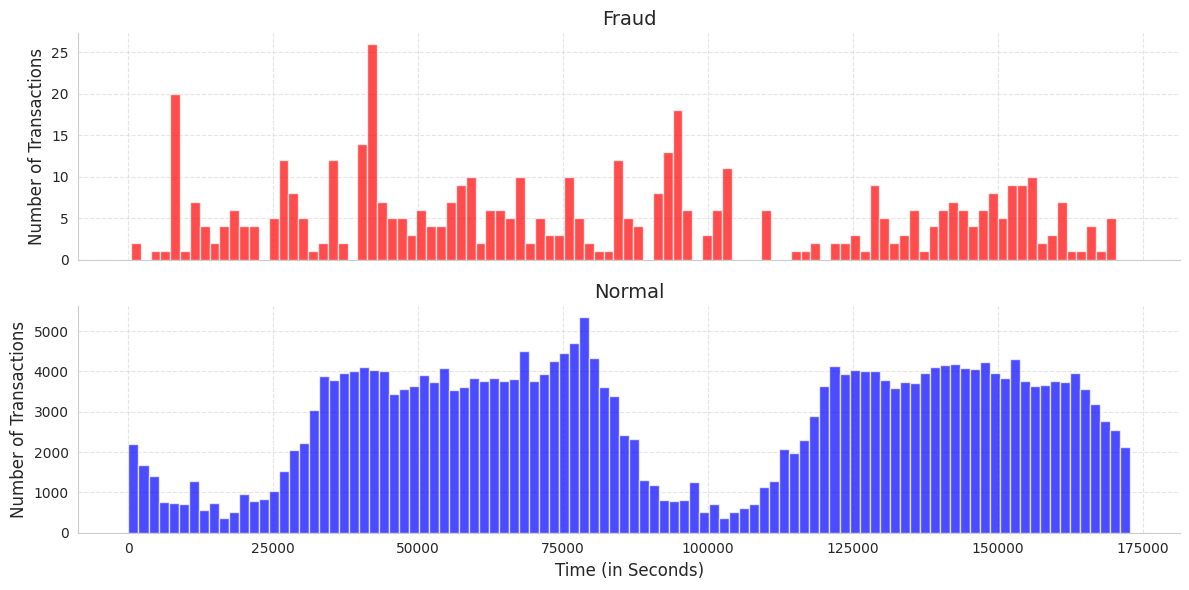

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

bins = 100

# Plotting for Fraud transactions
ax1.hist(data.Time[data.Class == 1], bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraud', fontsize=14)
ax1.set_ylabel('Number of Transactions', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Plotting for Normal transactions
ax2.hist(data.Time[data.Class == 0], bins=bins, color='blue', alpha=0.7)
ax2.set_title('Normal', fontsize=14)
ax2.set_xlabel('Time (in Seconds)', fontsize=12)
ax2.set_ylabel('Number of Transactions', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

# Remove top and right spines
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


Transcation Amounts for Fraud vs Normal

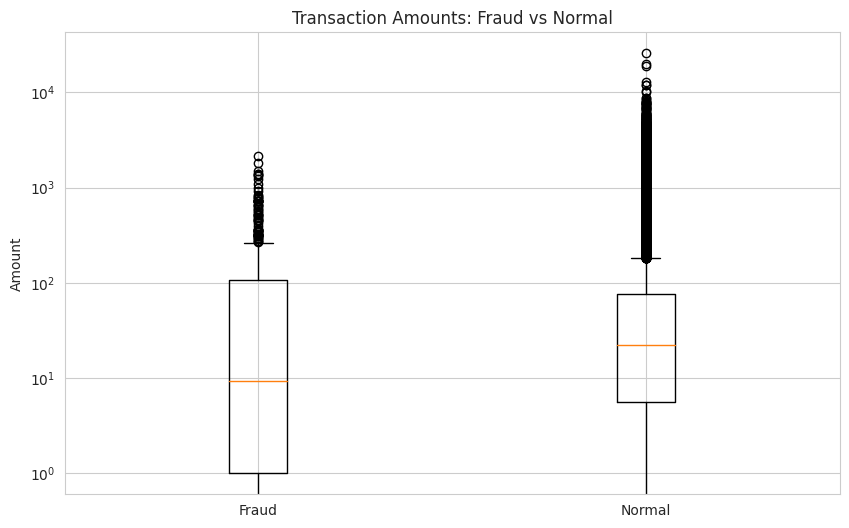

In [33]:
plt.figure(figsize=(10, 6))
plt.boxplot([data[data["Class"]==1]["Amount"], data[data["Class"]==0]["Amount"]],
            labels=['Fraud', 'Normal'])

plt.title('Transaction Amounts: Fraud vs Normal')
plt.ylabel('Amount')
plt.yscale('log')
plt.show()


This Dataset is highly unbalanced

0-->Normal Transcation

1-->Fraudulent Transcation

In [8]:
legit=data[data.Class==0]
fraud=data[data.Class==1]


In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
#statistical measure of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
#compare the values for both transcation
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample datset containing similar distribution of normal transcation and Fraudulent transcations

Number of Fraudulent transcations-->492

In [13]:
legit_sample=legit.sample(n=492)

In [14]:
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199979,133226.0,-2.017282,-1.568706,-0.035778,-1.976914,1.422737,-0.576726,0.017808,-0.006264,-1.005563,...,-0.049830,-0.095234,-0.525687,-1.430365,1.098772,-0.072544,0.236500,-0.010514,230.45,0
182923,125585.0,0.181446,0.927861,-0.492222,-0.291178,0.256864,-0.880262,0.583818,0.209480,-0.295367,...,-0.094754,-0.328951,0.397493,1.086219,-0.962312,-0.205460,-0.104575,-0.037875,14.26,0
242168,151373.0,-0.843708,-0.819868,-1.412222,-0.338110,-0.533602,0.333184,3.002659,-0.348437,0.113394,...,0.124174,-0.503221,1.226249,-1.189136,0.084482,-0.120994,-0.144122,0.108671,611.02,0
274232,165911.0,2.023457,-0.957824,-0.317445,-1.884243,-1.304171,-0.958647,-0.877487,-0.053882,2.980072,...,0.061601,0.515263,0.205758,-0.079058,-0.211567,-0.917612,0.104225,-0.027429,11.80,0
269095,163526.0,2.101052,0.054218,-2.186087,-0.129116,0.654240,-1.243168,0.683560,-0.420266,-0.007795,...,0.182844,0.638845,-0.087159,-0.340982,0.430728,0.246859,-0.088485,-0.093011,4.99,0


Concatenating two DataFrames

In [15]:
new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [16]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199979,133226.0,-2.017282,-1.568706,-0.035778,-1.976914,1.422737,-0.576726,0.017808,-0.006264,-1.005563,...,-0.049830,-0.095234,-0.525687,-1.430365,1.098772,-0.072544,0.236500,-0.010514,230.45,0
182923,125585.0,0.181446,0.927861,-0.492222,-0.291178,0.256864,-0.880262,0.583818,0.209480,-0.295367,...,-0.094754,-0.328951,0.397493,1.086219,-0.962312,-0.205460,-0.104575,-0.037875,14.26,0
242168,151373.0,-0.843708,-0.819868,-1.412222,-0.338110,-0.533602,0.333184,3.002659,-0.348437,0.113394,...,0.124174,-0.503221,1.226249,-1.189136,0.084482,-0.120994,-0.144122,0.108671,611.02,0
274232,165911.0,2.023457,-0.957824,-0.317445,-1.884243,-1.304171,-0.958647,-0.877487,-0.053882,2.980072,...,0.061601,0.515263,0.205758,-0.079058,-0.211567,-0.917612,0.104225,-0.027429,11.80,0
269095,163526.0,2.101052,0.054218,-2.186087,-0.129116,0.654240,-1.243168,0.683560,-0.420266,-0.007795,...,0.182844,0.638845,-0.087159,-0.340982,0.430728,0.246859,-0.088485,-0.093011,4.99,0


In [17]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [18]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91113.869919,0.047518,0.075394,0.032913,0.012706,0.061372,-0.042726,0.054312,0.057391,-0.044203,...,0.004074,-0.041114,-0.044733,0.008843,0.015873,-0.009004,-0.013402,0.015222,-0.002173,77.387561
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into features & Targets

In [20]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [21]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
199979  133226.0 -2.017282 -1.568706 -0.035778 -1.976914  1.422737 -0.576726   
182923  125585.0  0.181446  0.927861 -0.492222 -0.291178  0.256864 -0.880262   
242168  151373.0 -0.843708 -0.819868 -1.412222 -0.338110 -0.533602  0.333184   
274232  165911.0  2.023457 -0.957824 -0.317445 -1.884243 -1.304171 -0.958647   
269095  163526.0  2.101052  0.054218 -2.186087 -0.129116  0.654240 -1.243168   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [22]:
print(Y)

199979    0
182923    0
242168    0
274232    0
269095    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Splitting the data into training data & testing data

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [24]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [25]:
model=LogisticRegression()

In [26]:
#training the Logistic Regression model with training data
model.fit(X_train,Y_train)#features and labels

LogisticRegression()

Model Evaluation

Accuracy Score

In [27]:
#accuracy on training data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [29]:
print("Training data accuracy:",training_data_accuracy)

Training data accuracy: 0.9237611181702668


In [28]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [30]:
print("Testing data accuracy:",testing_data_accuracy)

Testing data accuracy: 0.8984771573604061


In [31]:
#score precision, recall, and f1
precision = precision_score(Y_test,X_test_prediction )
recall = recall_score(Y_test,X_test_prediction )
f1 = f1_score(Y_test,X_test_prediction)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')



Precision: 0.9333333333333333
Recall: 0.8571428571428571
F1 Score: 0.8936170212765957


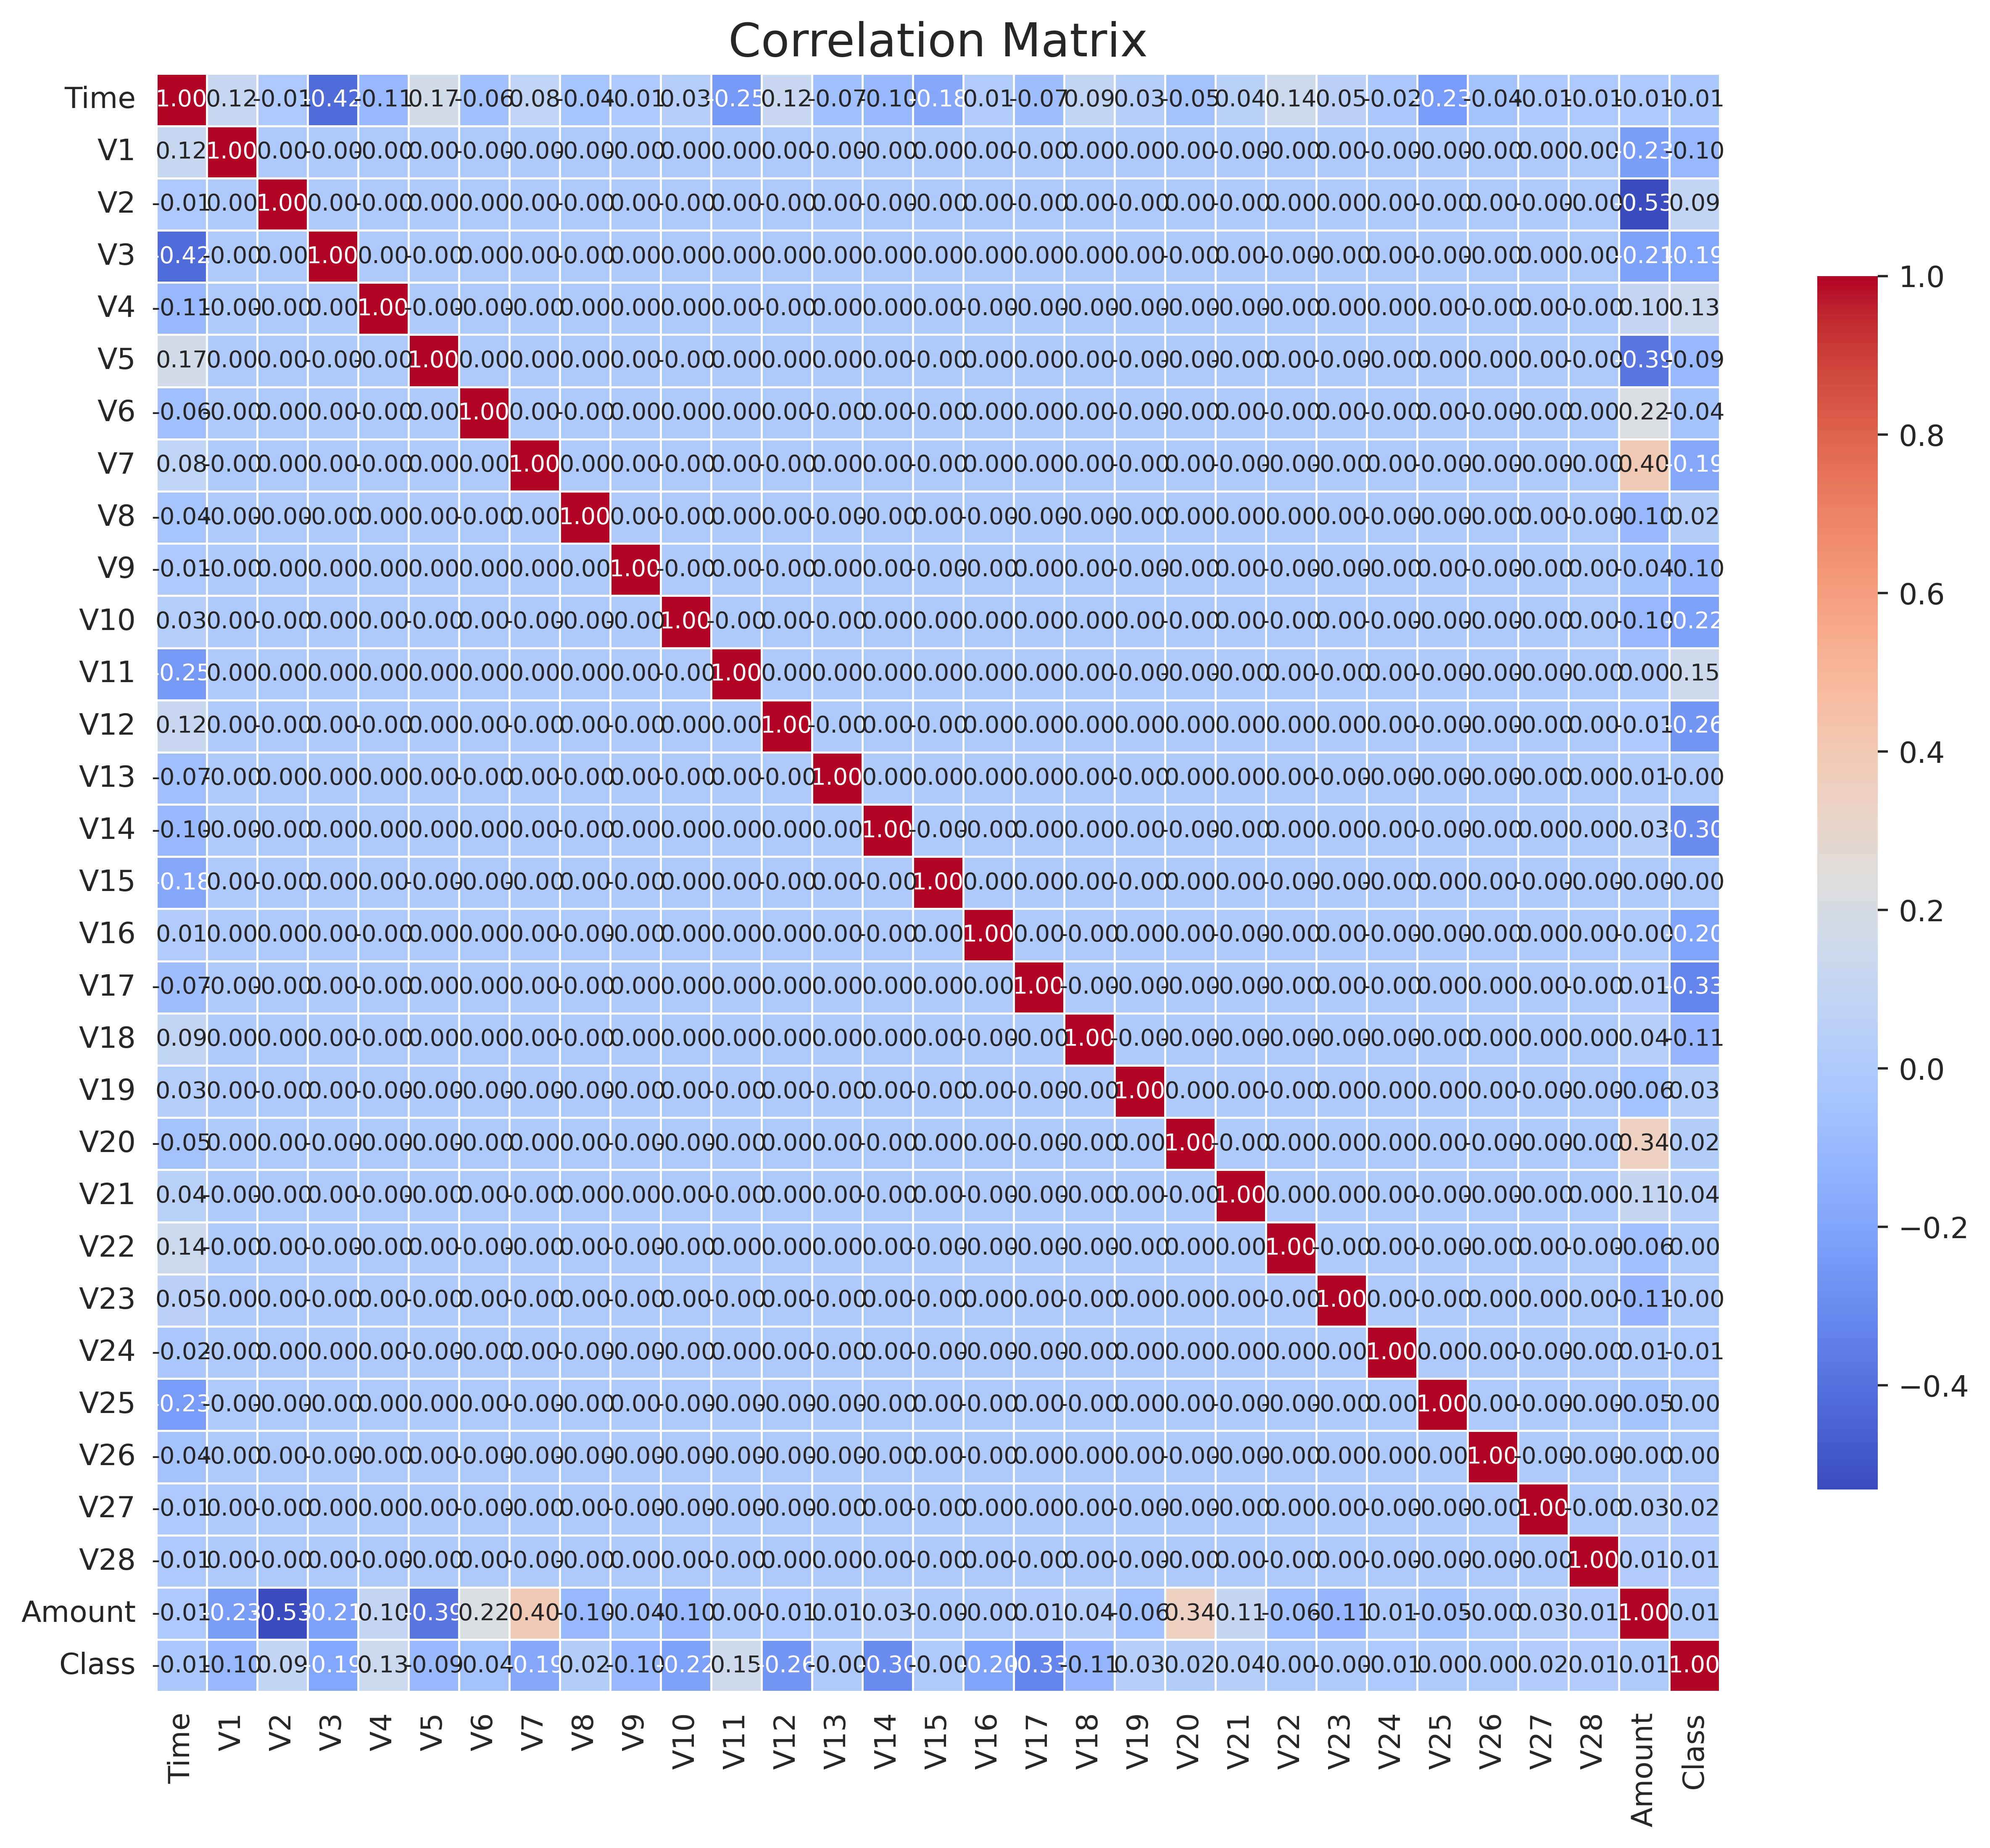

In [38]:
corr=data.corr(method='pearson')
plt.figure(figsize=(12,10), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5,cmap="coolwarm",cbar_kws={"shrink": 0.75},annot_kws={"size": 8})
plt.title("Correlation Matrix", fontsize=16)
plt.show()